## Importing libraries

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [27]:
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(27.15567, shape=(), dtype=float32)


In [28]:
print(tf.config.list_physical_devices('CPU'))

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## Data preprocessing

### Training Image Preprocessing

In [29]:
training_set=tf.keras.utils.image_dataset_from_directory(
    "train/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 47391 files belonging to 26 classes.


## validation image processing

In [30]:
validation_set= training_set=tf.keras.utils.image_dataset_from_directory(
    "valid/valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [31]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [32]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[101.5   94.5  106.5 ]
   [ 89.25  82.75  94.25]
   [ 81.75  75.25  86.75]
   ...
   [  4.5    4.5    6.5 ]
   [  4.5    4.5    6.5 ]
   [  4.5    4.5    6.5 ]]

  [[179.25 171.25 184.25]
   [172.5  164.5  177.5 ]
   [164.   156.   169.  ]
   ...
   [ 10.    10.    12.  ]
   [ 10.    10.    12.  ]
   [ 10.    10.    12.  ]]

  [[167.75 159.75 172.75]
   [174.5  166.5  179.5 ]
   [180.   172.   185.  ]
   ...
   [ 10.5   10.5   12.5 ]
   [ 10.5   10.5   12.5 ]
   [ 10.5   10.5   12.5 ]]

  ...

  [[163.25 158.25 178.25]
   [182.5  177.5  197.5 ]
   [167.25 162.25 182.25]
   ...
   [170.75 165.75 187.75]
   [164.75 159.75 181.75]
   [162.75 157.75 179.75]]

  [[143.25 138.25 158.25]
   [162.5  157.5  177.5 ]
   [178.75 173.75 193.75]
   ...
   [170.25 165.25 187.25]
   [169.25 164.25 186.25]
   [164.75 159.75 181.75]]

  [[153.   148.   168.  ]
   [176.   171.   191.  ]
   [184.   179.   199.  ]
   ...
   [163.75 158.75 180.75]
   [172.25 167.25 189.25]
   [161.   156.   17

## Building Model

In [33]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout # type: ignore
from tensorflow.keras.models import Sequential # type: ignore

In [34]:
model= Sequential()

In [35]:
### Building Convulation Layer

In [36]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

In [37]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

In [38]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

In [39]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

In [40]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

In [41]:
model.add(Dropout(0.25))   #to avoid overfitting

In [42]:
model.add(Flatten())

In [43]:
model.add(Dense(units=1500,activation='relu')) ##Increase neurons

In [44]:
model.add(Dropout(0.4))

In [45]:
##output layer
model.add(Dense(units=38, activation='softmax'))

## Compiling Model

### to avoid overshooting
1. we repalace learning rate from default 0.001 to 0.0001
2. there may be chance of underfitting , so increase number of neuron
3. we add more convuation layer to extract more feature from image there may be possibility that model is confusing due to lack of feature

In [46]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

## Model training ---

In [48]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)


Epoch 1/10
550/550 [==============================] - 1687s 3s/step - loss: 2.6166 - accuracy: 0.2672 - val_loss: 1.3810 - val_accuracy: 0.5839
Epoch 2/10
550/550 [==============================] - 1923s 3s/step - loss: 1.3327 - accuracy: 0.5990 - val_loss: 0.8945 - val_accuracy: 0.7239
Epoch 3/10
550/550 [==============================] - 2095s 4s/step - loss: 0.8872 - accuracy: 0.7228 - val_loss: 0.6081 - val_accuracy: 0.8071
Epoch 4/10
550/550 [==============================] - 1342s 2s/step - loss: 0.6423 - accuracy: 0.7976 - val_loss: 0.3664 - val_accuracy: 0.8809
Epoch 5/10
550/550 [==============================] - 1231s 2s/step - loss: 0.4757 - accuracy: 0.8481 - val_loss: 0.2614 - val_accuracy: 0.9173
Epoch 6/10
550/550 [==============================] - 1613s 3s/step - loss: 0.3805 - accuracy: 0.8786 - val_loss: 0.1791 - val_accuracy: 0.9433
Epoch 7/10
550/550 [==============================] - 2139s 4s/step - loss: 0.2875 - accuracy: 0.9079 - val_loss: 0.2230 - val_accuracy:

## attained validation accuracy as 98 percent

## Model Evaluation

In [49]:
### Model Evaluation on training set

In [50]:
train_loss,train_acc = model.evaluate(training_set)

550/550 [==============================] - 177s 322ms/step - loss: 0.0554 - accuracy: 0.9849


In [51]:
print(train_loss,train_acc)

0.05536886677145958 0.9848622679710388


In [52]:
##model on validation set

In [53]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 171s 311ms/step - loss: 0.0554 - accuracy: 0.9849


In [54]:
print(val_loss,val_acc)

0.05536890774965286 0.9848622679710388


## saving model

In [55]:
model.save("trained_model.h5")

In [56]:
model.save("trained_model.keras")

###model.save('your_model.h5', save_format='h5', include_optimizer=True, compression='gzip', compression_opts=9)


In [57]:
training_history.history

{'loss': [2.616562843322754,
  1.3327256441116333,
  0.887165367603302,
  0.642325222492218,
  0.4756881892681122,
  0.3804604709148407,
  0.28748175501823425,
  0.2411152422428131,
  0.19544701278209686,
  0.1770181953907013],
 'accuracy': [0.2671864330768585,
  0.598964273929596,
  0.7227976322174072,
  0.7975757122039795,
  0.8481106162071228,
  0.8786137104034424,
  0.9079216718673706,
  0.9208968877792358,
  0.935920774936676,
  0.9422945380210876],
 'val_loss': [1.3810198307037354,
  0.8944848775863647,
  0.6081157922744751,
  0.3664129674434662,
  0.2614361345767975,
  0.17911234498023987,
  0.22304362058639526,
  0.1730593591928482,
  0.09738995134830475,
  0.05536893010139465],
 'val_accuracy': [0.5838834643363953,
  0.7239357829093933,
  0.8071363568305969,
  0.880946934223175,
  0.9173116087913513,
  0.943261981010437,
  0.9265308380126953,
  0.945026159286499,
  0.9697814583778381,
  0.9848622679710388]}

## recording history

In [58]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy visualization

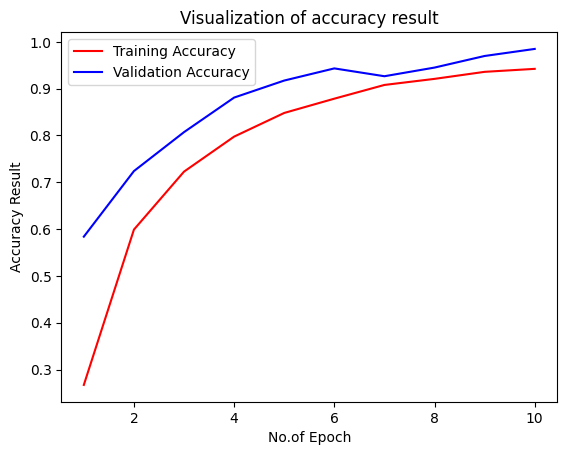

In [59]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No.of Epoch")
plt.ylabel("Accuracy Result")
plt.title("Visualization of accuracy result")
plt.legend()
plt.show()

### some other metrics for model evaluation

In [60]:
class_name= validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [61]:
test_set=training_set=tf.keras.utils.image_dataset_from_directory(
    "valid/valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [62]:
y_pred= model.predict(test_set)
y_pred, y_pred.shape

550/550 [==============================] - 245s 445ms/step


(array([[9.9143595e-01, 1.5074473e-06, 5.3449429e-07, ..., 2.4358039e-08,
         1.3624600e-10, 9.3093389e-10],
        [9.9126512e-01, 1.7598204e-04, 2.0996151e-06, ..., 1.1590415e-07,
         1.0804927e-09, 6.4600258e-08],
        [9.9999988e-01, 3.8487222e-09, 2.0710882e-09, ..., 3.8774006e-12,
         1.3479533e-12, 7.1071246e-11],
        ...,
        [2.5505704e-05, 4.1621769e-07, 1.4560352e-04, ..., 8.0918932e-07,
         1.0065723e-06, 7.8352702e-01],
        [9.5621135e-06, 9.1971536e-08, 8.4262036e-05, ..., 2.2621856e-07,
         1.8101127e-07, 9.9865556e-01],
        [6.0096345e-10, 3.0230832e-11, 8.7741381e-10, ..., 2.5728563e-11,
         3.3114640e-09, 9.9997866e-01]], dtype=float32),
 (17572, 38))

In [63]:
predicted_categories= tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [64]:
true_category= tf.concat([y for x,y in test_set], axis=0 )
true_category

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [65]:
Y_true= tf.argmax(true_category,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

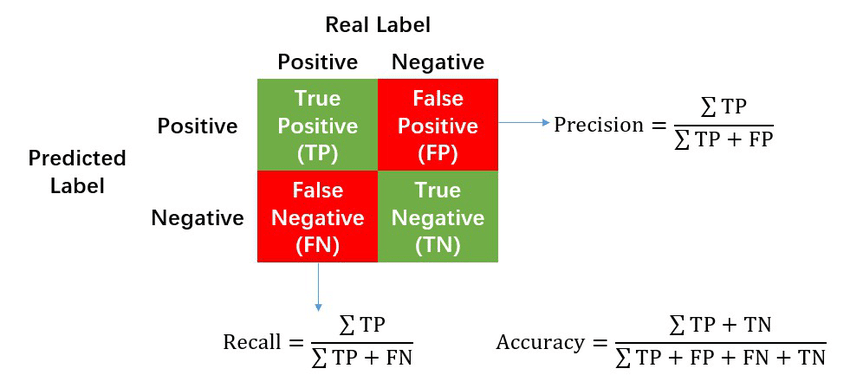

In [66]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.96      0.97       504
                                 Apple___Black_rot       1.00      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.99      0.99       440
                                   Apple___healthy       0.94      1.00      0.97       502
                               Blueberry___healthy       0.99      1.00      0.99       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.99      0.99       421
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       1.00      0.94      0.97       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      1.00      0.

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[483,   0,   0, ...,   0,   0,   0],
       [  3, 486,   0, ...,   0,   0,   0],
       [  0,   0, 436, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 490,   0,   0],
       [  0,   0,   0, ...,   0, 444,   0],
       [  0,   0,   0, ...,   0,   0, 458]], dtype=int64)

### confusion matrix visualization

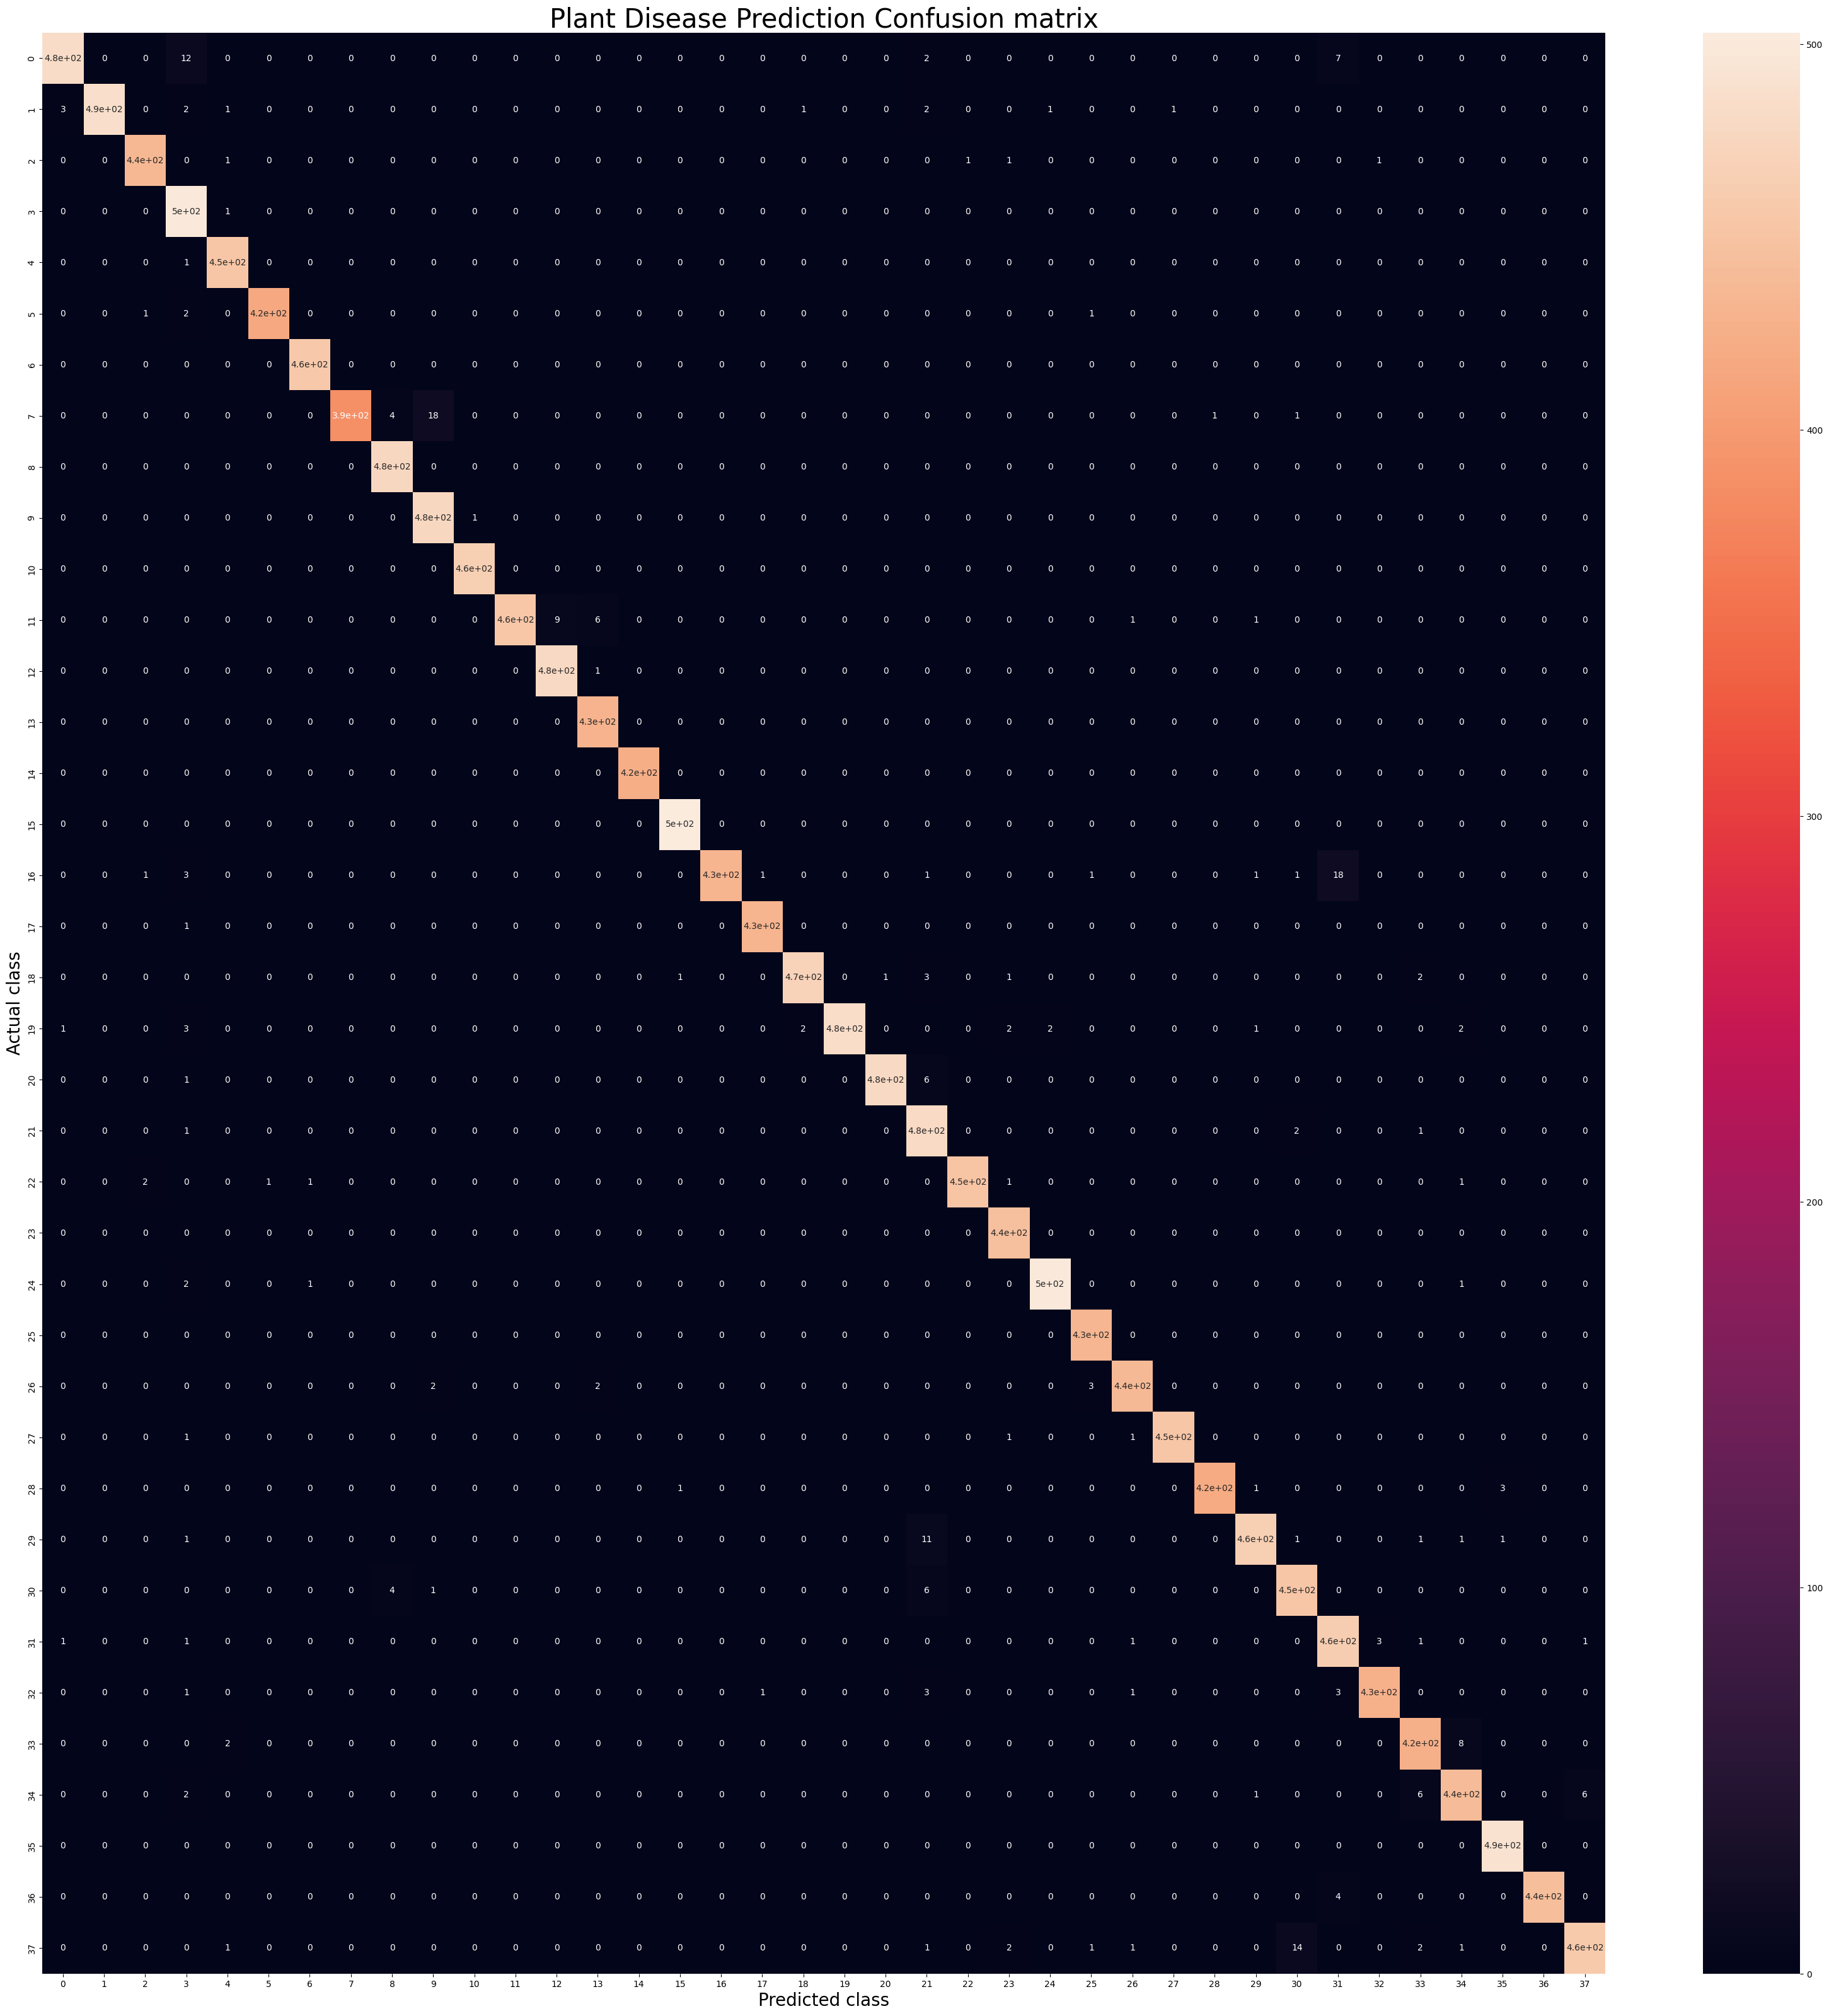

In [70]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted class",fontsize=20)
plt.ylabel("Actual class",fontsize=20)
plt.title("Plant Disease Prediction Confusion matrix",fontsize=30)
plt.show()